In [6]:
import model
import numpy as np
import matplotlib.pyplot as plt

noise = np.load("data/noise.npy")
print(noise.shape)
output = model.generative_model(noise)


(10000, 50)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ot
import os
import sys
from sklearn.model_selection import train_test_split


# Read in the data
df40 = pd.read_csv('data/station_40.csv', index_col=0)
df49 = pd.read_csv('data/station_49.csv', index_col=0)
df63 = pd.read_csv('data/station_63.csv', index_col=0)
df80 = pd.read_csv('data/station_80.csv', index_col=0)

df40.columns = df40.columns.to_numpy() + '_s40'
df49.columns = df49.columns.to_numpy() + '_s49'
df63.columns = df63.columns.to_numpy() + '_s63'
df80.columns = df80.columns.to_numpy() + '_s80'

data = pd.concat([df40, df49, df63, df80], axis=1)
data = data.reindex(columns=sorted(data.columns))
Q1,Q2,Q3,Q4 = 3.3241,5.1292,6.4897,7.1301

lid = (data["W_13_s49"]+data["W_14_s49"]+data["W_15_s49"] <=Q1) * (data["W_13_s80"]+data["W_14_s80"]+data["W_15_s80"] <=Q2) * (data["W_13_s40"]+data["W_14_s40"]+data["W_15_s40"] <=Q3) * (data["W_13_s63"]+data["W_14_s63"]+data["W_15_s63"] <=Q4)
lid = lid.to_numpy()
lidtrain, lidtest = train_test_split(lid, test_size=0.2, random_state=42)

gendata = data[data["W_13_s49"]+data["W_14_s49"]+data["W_15_s49"] <=Q1]
gendata = gendata[gendata["W_13_s80"]+data["W_14_s80"]+data["W_15_s80"] <=Q2]   
gendata = gendata[gendata["W_13_s40"]+data["W_14_s40"]+data["W_15_s40"] <=Q3]
gendata = gendata[gendata["W_13_s63"]+data["W_14_s63"]+data["W_15_s63"] <=Q4]
Yield = gendata[["YIELD_s40","YIELD_s49","YIELD_s63","YIELD_s80"]]
Y = Yield.to_numpy()


C:\Users\matth\AppData\Local\Temp\ipykernel_28320\1810234425.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gendata = gendata[gendata["W_13_s80"]+data["W_14_s80"]+data["W_15_s80"] <=Q2]
C:\Users\matth\AppData\Local\Temp\ipykernel_28320\1810234425.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gendata = gendata[gendata["W_13_s40"]+data["W_14_s40"]+data["W_15_s40"] <=Q3]
C:\Users\matth\AppData\Local\Temp\ipykernel_28320\1810234425.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gendata = gendata[gendata["W_13_s63"]+data["W_14_s63"]+data["W_15_s63"] <=Q4]


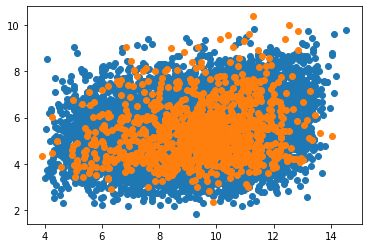

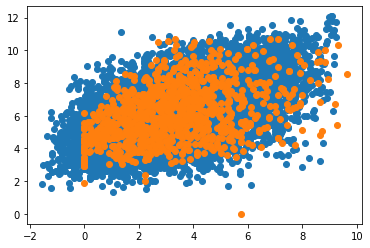

In [23]:
plt.scatter(output[:,0], output[:,1])
plt.scatter(Y[:,0], Y[:,1])
plt.show()
plt.scatter(output[:,2], output[:,3])
plt.scatter(Y[:,2], Y[:,3])

In [25]:
outputsampled = output[np.random.choice(output.shape[0], 1000, replace=False), :]

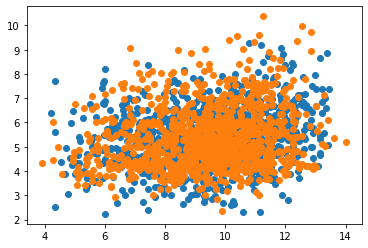

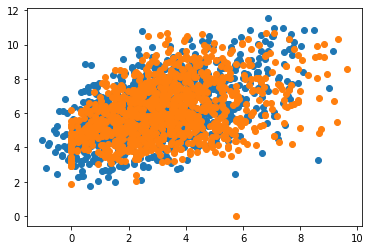

In [26]:
plt.scatter(outputsampled[:, 0], outputsampled[:, 1]) 
plt.scatter(Y[:, 0], Y[:, 1])
plt.show()
plt.scatter(outputsampled[:, 2], outputsampled[:, 3])
plt.scatter(Y[:, 2], Y[:, 3])


In [19]:
def dist(X,Y,n_projections=1000):
    n = len(Y)
    a, b = np.ones((n,)) / n, np.ones((n,)) / n  # uniform distribution on samples

    l = ot.sliced_wasserstein_distance(X, Y, a, b, n_projections, seed=np.array(range(50)))
    return np.mean(l)

dist(outputsampled, Y)

0.14172172056221016

In [27]:
outputsampled = np.maximum(outputsampled, 0)

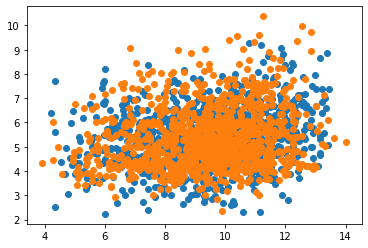

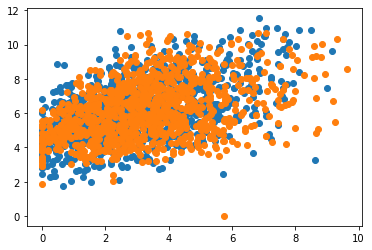

In [29]:
plt.scatter(outputsampled[:, 0], outputsampled[:, 1]) 
plt.scatter(Y[:, 0], Y[:, 1])
plt.show()
plt.scatter(outputsampled[:, 2], outputsampled[:, 3])
plt.scatter(Y[:, 2], Y[:, 3])

In [28]:
dist(outputsampled, Y)

0.16614293261709492